# This program analyzes soccer data from fbref.com

We will focus on analyzing Real Madrid

In [38]:
# Loading domestic league results data for real madrid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [116]:
df = pd.read_csv('./domestic-league-results.csv', delimiter=',', parse_dates=True)

In [117]:
df.head()

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,2021-2022,Real Madrid,es ESP,1. La Liga,1st,26,18,6,2,52,20,32,60,36227.0,Karim Benzema - 19,Thibaut Courtois,NaN
1,2020-2021,Real Madrid,es ESP,1. La Liga,2nd,38,25,9,4,67,28,39,84,NaN,Karim Benzema - 23,Thibaut Courtois,→ UEFA Champions League via league finish
2,2019-2020,Real Madrid,es ESP,1. La Liga,1st,38,26,9,3,70,25,45,87,45833.0,Karim Benzema - 21,Thibaut Courtois,→ UEFA Champions League via league finish
3,2018-2019,Real Madrid,es ESP,1. La Liga,3rd,38,21,5,12,63,46,17,68,61040.0,Karim Benzema - 21,Thibaut Courtois,→ UEFA Champions League via league finish
4,2017-2018,Real Madrid,es ESP,1. La Liga,3rd,38,22,10,6,94,44,50,76,66863.0,Cristiano Ronaldo - 26,Keylor Navas,→ UEFA Champions League via Champions League win


In [118]:
df.tail()

,Season,Squad,Country,Comp,LgRank,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
29,1992-1993,Real Madrid,es ESP,1. La Liga,2nd,38,24,9,5,75,28,47,57,NaN,Iván Zamorano - 26,NaN,→ European Cup Winners' Cup via cup win
30,1991-1992,Real Madrid,es ESP,1. La Liga,2nd,38,23,8,7,78,32,46,54,NaN,Fernando Hierro - 21,NaN,→ UEFA Cup via league finish
31,1990-1991,Real Madrid,es ESP,1. La Liga,3rd,38,20,6,12,63,37,26,46,NaN,Emilio Butragueño - 19,NaN,→ UEFA Cup via league finish
32,1989-1990,Real Madrid,es ESP,1. La Liga,1st,38,26,10,2,107,38,69,62,NaN,Hugo Sánchez - 38,NaN,→ European Cup via league finish
33,1988-1989,Real Madrid,es ESP,1. La Liga,1st,38,25,12,1,91,37,54,62,NaN,Hugo Sánchez - 27,NaN,→ European Cup via league finish


In [119]:
df.describe()

,MP,W,D,L,GF,GA,GD,Pts,Attendance
count,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000,22.000000
mean,37.882353,23.852941,7.529412,6.50000,82.441176,39.088235,43.352941,74.382353,65901.363636
std,2.306312,4.053673,2.936038,3.32347,18.348794,8.843308,21.082640,14.713454,10113.645128
min,26.000000,16.000000,2.000000,1.00000,52.000000,20.000000,10.000000,45.000000,36227.000000
25%,38.000000,21.000000,5.250000,4.00000,69.250000,33.250000,26.000000,62.250000,64438.250000
50%,38.000000,24.000000,7.000000,6.00000,77.500000,38.000000,44.500000,76.000000,68887.500000
75%,38.000000,26.750000,9.750000,8.75000,100.000000,44.000000,59.250000,86.500000,71490.750000
max,42.000000,32.000000,14.000000,12.00000,121.000000,62.000000,89.000000,100.000000,74836.000000


Total Observations: 34 except for attendance


In [120]:
df.dtypes

Season              object
Squad               object
Country             object
Comp                object
LgRank              object
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Attendance         float64
Top Team Scorer     object
Goalkeeper          object
Notes               object
dtype: object

In [143]:
df.loc[:,['Season', 'Notes']]

,Season,Notes
0,2021-2022,NaN
1,2020-2021,→ UEFA Champions League via league finish
2,2019-2020,→ UEFA Champions League via league finish
3,2018-2019,→ UEFA Champions League via league finish
4,2017-2018,→ UEFA Champions League via Champions League win
5,2016-2017,→ UEFA Champions League via Champions League win
6,2015-2016,→ UEFA Champions League via Champions League win
7,2014-2015,→ UEFA Champions League via league finish
8,2013-2014,→ UEFA Champions League via Champions League win
9,2012-2013,→ UEFA Champions League via league finish


# Removing incomplete and irrelevant data

In [123]:
df = df.drop(['Squad', 'Country', 'Comp', 'Attendance', 'Goalkeeper'], axis=1)

In [124]:
df.dtypes

Season             object
LgRank             object
MP                  int64
W                   int64
D                   int64
L                   int64
GF                  int64
GA                  int64
GD                  int64
Pts                 int64
Top Team Scorer    object
Notes              object
dtype: object

In [125]:
df.describe()

,MP,W,D,L,GF,GA,GD,Pts
count,34.000000,34.000000,34.000000,34.00000,34.000000,34.000000,34.000000,34.000000
mean,37.882353,23.852941,7.529412,6.50000,82.441176,39.088235,43.352941,74.382353
std,2.306312,4.053673,2.936038,3.32347,18.348794,8.843308,21.082640,14.713454
min,26.000000,16.000000,2.000000,1.00000,52.000000,20.000000,10.000000,45.000000
25%,38.000000,21.000000,5.250000,4.00000,69.250000,33.250000,26.000000,62.250000
50%,38.000000,24.000000,7.000000,6.00000,77.500000,38.000000,44.500000,76.000000
75%,38.000000,26.750000,9.750000,8.75000,100.000000,44.000000,59.250000,86.500000
max,42.000000,32.000000,14.000000,12.00000,121.000000,62.000000,89.000000,100.000000


In [126]:
df.shape

(34, 12)

In [127]:
# Converting df to numpy
df_to_np = df.to_numpy()

In [128]:
df_to_np.shape

(34, 12)

In [129]:
print(df_to_np[:, 0])

['2021-2022' '2020-2021' '2019-2020' '2018-2019' '2017-2018' '2016-2017'
 '2015-2016' '2014-2015' '2013-2014' '2012-2013' '2011-2012' '2010-2011'
 '2009-2010' '2008-2009' '2007-2008' '2006-2007' '2005-2006' '2004-2005'
 '2003-2004' '2002-2003' '2001-2002' '2000-2001' '1999-2000' '1998-1999'
 '1997-1998' '1996-1997' '1995-1996' '1994-1995' '1993-1994' '1992-1993'
 '1991-1992' '1990-1991' '1989-1990' '1988-1989']


<AxesSubplot:title={'center':'Wins per season'}, xlabel='Season'>

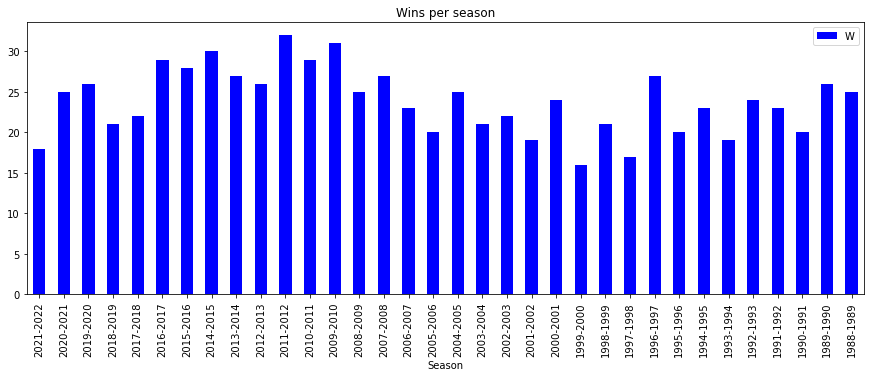

In [130]:
df.plot.bar(x='Season', y='W', title='Wins per season', figsize=(15, 5), color='blue')

<AxesSubplot:title={'center':'Losses per season'}, xlabel='Season'>

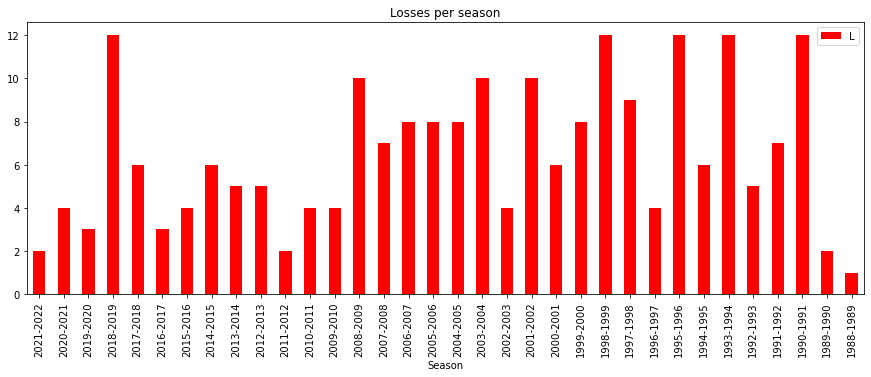

In [131]:
df.plot.bar(x='Season', y='L', title="Losses per season", figsize=(15, 5), color='red')

<AxesSubplot:title={'center':'Draws per season'}, xlabel='Season'>

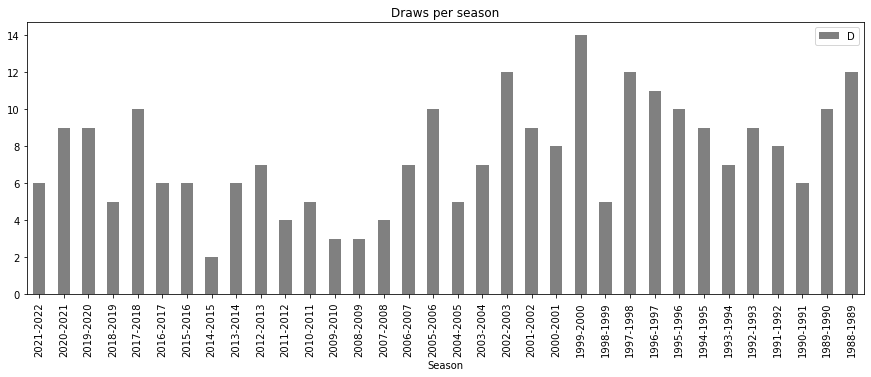

In [132]:
df.plot.bar(x='Season', y='D', title='Draws per season', figsize=(15, 5), color='gray')

<AxesSubplot:title={'center':'Points per season'}, xlabel='Season'>

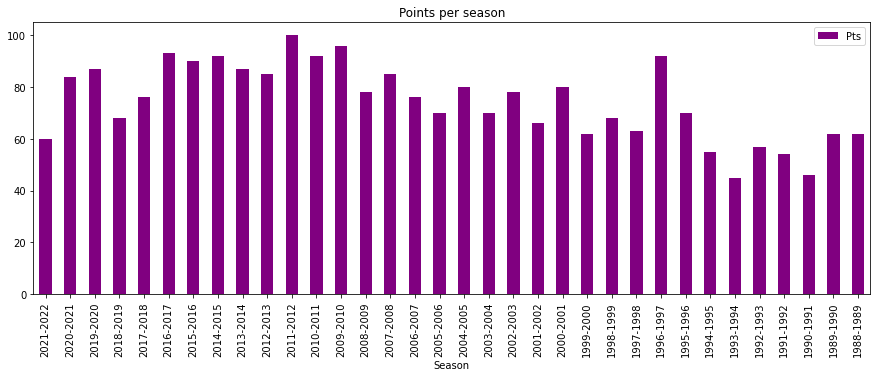

In [133]:
df.plot.bar(x='Season', y='Pts', title='Points per season', figsize=(15, 5), color='purple')